In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import warnings
warnings.filterwarnings('ignore')

In [2]:
tree = ET.parse('tokens.xml')
syrtrans = 'all tokens'

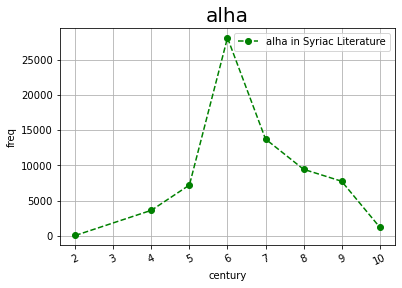

In [4]:
root = tree.getroot()
searchword = root[0][2][0].text.split(sep='"')[1] #the searchword 

year = []
freq = []
for item in root.iter('item'):
    if item[0].attrib['attribute']=="doc.Epoch":
        #print(item[0].text, item[1].text)
        year.append(item[0].text)
        freq.append(item[1].text)
    
df = pd.DataFrame({'year':year, 'freq':freq})

#cleaning
df.loc[df['year'].str.contains('\['), 'year'] = '-'
df.loc[df['year'].str.contains('Date'), 'year'] = '-'
df = df[df['year']!='-']
df['year'] = pd.to_numeric(df['year'])
df['freq'] = pd.to_numeric(df['freq'])
# df['year'] = df['year'].str.replace('$','')

#processing
def centuryFromYear(year):
    return (year) // 100 + 1
df['century'] = df['year'].apply(lambda x: centuryFromYear(x))
df=df.drop('year', axis=1)
s = df.groupby(['century']).sum()
s = s[s.index<11]
#plt.scatter(df['year'], df['freq'], color = 'g',s = 100)
plt.plot(s.index, s.values, color = 'g', linestyle = 'dashed',
         marker = 'o', label=f'{syrtrans} in Syriac Literature')
plt.xticks(rotation = 25)
plt.xlabel('century')
plt.ylabel('freq')
plt.title(syrtrans, fontsize = 20)

plt.grid() #not in scatter
plt.legend() #not in scatter
plt.show()


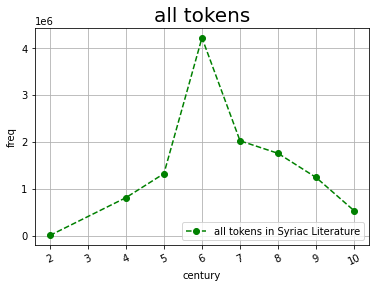

In [3]:
### alternative function for total corpus overview data
root = tree.getroot()
year = []
freq = []
for item in root.iter('item'):
    year.append(item[0].text)
    freq.append(item[1].text)
    
df = pd.DataFrame({'year':year, 'freq':freq})

#cleaning
df.loc[df['year'].str.contains('\['), 'year'] = '-'
df.loc[df['year'].str.contains('Date'), 'year'] = '-'
df = df[df['year']!='-']
df['year'] = pd.to_numeric(df['year'])
df['freq'] = pd.to_numeric(df['freq'])
# df['year'] = df['year'].str.replace('$','')

#processing
def centuryFromYear(year):
    return (year) // 100 + 1
df['century'] = df['year'].apply(lambda x: centuryFromYear(x))
df=df.drop('year', axis=1)
s = df.groupby(['century']).sum()
s = s[s.index<11]
#plt.scatter(df['year'], df['freq'], color = 'g',s = 100)
plt.plot(s.index, s.values, color = 'g', linestyle = 'dashed',
         marker = 'o', label=f'{syrtrans} in Syriac Literature')
plt.xticks(rotation = 25)
plt.xlabel('century')
plt.ylabel('freq')
plt.title(syrtrans, fontsize = 20)

plt.grid() #not in scatter
plt.legend() #not in scatter
plt.show()


In [5]:
temp = df.groupby(['century']).sum()
temp.to_excel('all_tokens_per_century.xlsx')

In [192]:
SyrList = ('ܐܒܓܕܗܘܙܚܛܝܟܠܡܢܣܥܦܨܩܪܫܬ̣̱̤̇̈ܲ̄̄̇̈()؟܀.:')
EngList = ('abgdhwz;jyklmnsipxqrvtP:IZOL!K$%()?*.|')